### Import, %matplotlib inline is needed to display the graph within the notebook

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

%reload_ext autoreload
%autoreload 2

## Functional plot

Text(0, 0.5, 'Squares')

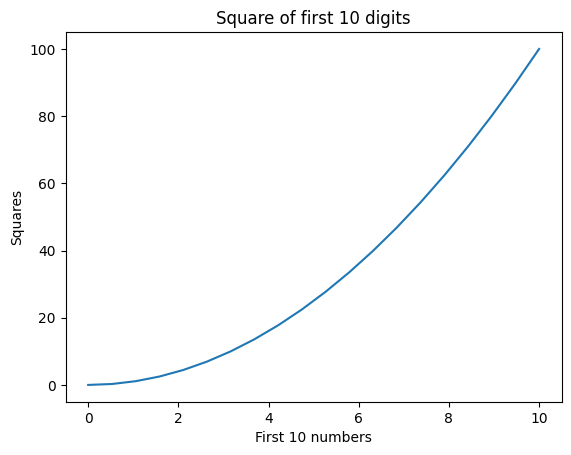

In [2]:
x1=np.linspace(0,10,20)
y1=x1**2
plt.plot(x1,y1)
plt.title("Square of first 10 digits")
plt.xlabel("First 10 numbers")
plt.ylabel("Squares")

## Print multiple plots

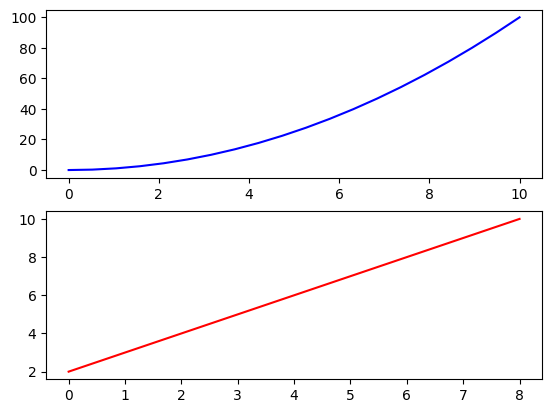

In [3]:
x2=np.arange(0,10,2)
y2=x2+2
plt.subplot(2,1,2)
plt.plot(x2,y2, 'r')
plt.subplot(2,1,1)
plt.plot(x1,y1, 'b')

## Using figure objects

Text(5, 150, 'Message2')

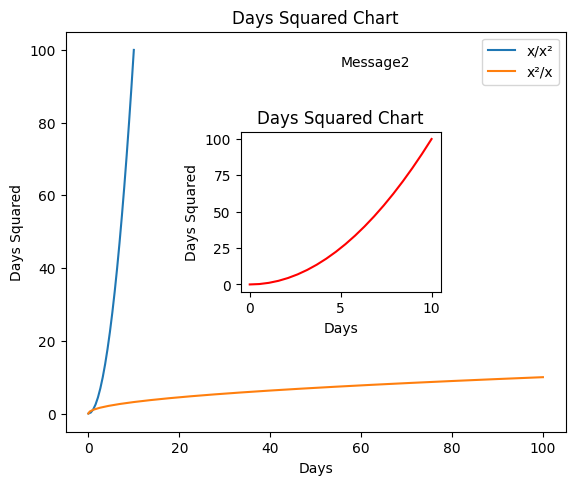

In [4]:
fig_1 = plt.figure(figsize=(5,4),dpi=100)
axes1 = fig_1.add_axes([0.1,0.1,1,1])
axes1.set_xlabel("Days")
axes1.set_ylabel("Days Squared")
axes1.set_title("Days Squared Chart")
axes1.plot(x1,y1,label='x/x²')
axes1.plot(y1,x1,label='x²/x')
axes1.legend(loc=0)

axes2 = fig_1.add_axes([0.45,0.45,0.4,0.4])
axes2.set_title("Days Squared Chart")
axes2.set_xlabel("Days")
axes2.set_ylabel("Days Squared")
axes2.plot(x1,y1,'r')
axes2.text(5,150,'Message2')